In [1]:
from nilearn import masking,plotting
from antspynet.utilities import brain_extraction
import ants
import matplotlib.pyplot as plt
from nilearn import image
import os
import nibabel as nib


2024-05-07 14:23:35.772240: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 14:23:35.803198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 14:23:36.319087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
T1='./bids/sub-JR/JR-T1w.nii'

brain_image=ants.image_read(T1)
probability_brain_mask = brain_extraction(brain_image, modality="t1")

2024-05-07 14:23:39.559575: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
ants.image_write(probability_brain_mask,'/home/jeffrey/Desktop/Sub-CB/mask3.nii.gz')
mask='/home/jeffrey/Desktop/Sub-CB/mask3.nii.gz'
mask=image.math_img('img>0.5',img=mask)
nib.save(mask,'/home/jeffrey/Desktop/Sub-CB/mask3.nii.gz')

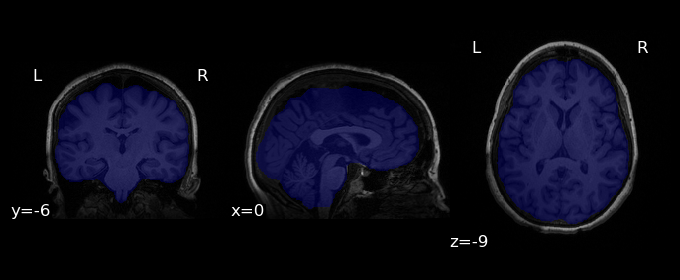

In [4]:
mask=image.math_img('img>0.5',img=mask)

plotting.plot_roi(roi_img=mask,bg_img=T1,alpha=0.4,draw_cross=False)


In [5]:
mask='/home/jeffrey/Desktop/Sub-CB/mask3.nii.gz'
fi = brain_image
mask = ants.image_read(mask)
mask = ants.threshold_image(mask, 1, 1e15)
seg = ants.kmeans_segmentation(fi,3,kmask=mask)
priorseg = ants.prior_based_segmentation(
    fi, seg['probabilityimages'], mask, 0.25, 0.1, 3)

ants.image_write(priorseg['segmentation'],'ants_seg.nii.gz')
priorseg=[]

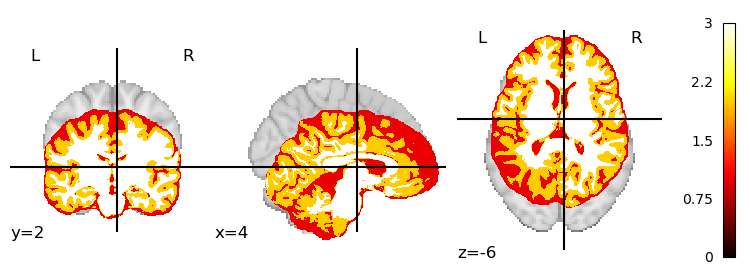

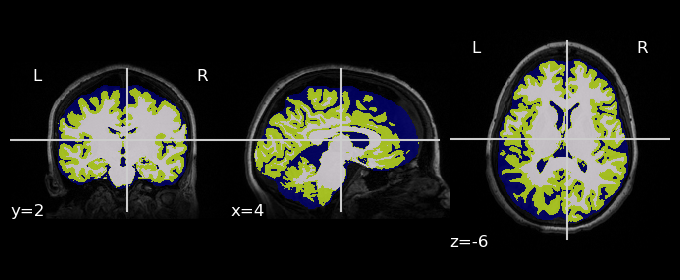

/home/jeffrey/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:784: UserWarning:


/home/jeffrey/anaconda3/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning:

Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.



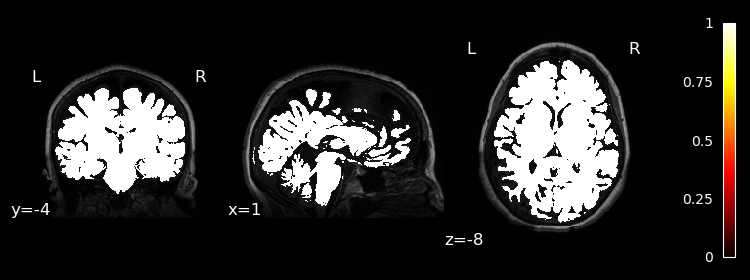

In [11]:
seg='ants_seg.nii.gz'
mask='/home/jeffrey/Desktop/Sub-CB/mask3.nii.gz'

plotting.plot_stat_map(seg)
plt.show()

inter=image.math_img('img1*img2',img1=seg,img2=mask)
plotting.plot_roi(inter,bg_img=T1)
plt.show()
inter=image.math_img('img1>1',img1=inter)

plotting.view_img(inter,bg_img=T1,draw_cross=False)
plotting.plot_stat_map(inter,bg_img=T1,draw_cross=False)


In [12]:
mask='mask3.nii.gz'
mask = image.math_img('img+0',img=mask)

x=mask.get_fdata()

sum(sum(sum(x)))*0.001




1228.1840711592286

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [8]:
import json
f = open('T1w.json',) 
   
# returns JSON object as  
# a dictionary 
data = json.load(f) 
   
# Closing file 
f.close() 